# TP 1 - Regression, classification

## 1 - Regression of housing prices

We are going to build a predictor of the price of a flat in Lille according to its surface area.

In [1]:
import pandas as pd

df = pd.read_csv('1housing.csv')
df.T

,0,1,2,3,4,5,6,7,8,9
size,46.0,49.0,39.0,14.0,34.0,32.0,28.0,52.0,65.0,51.0
price,767.0,818.0,683.0,282.0,656.0,530.0,539.0,916.0,1063.0,848.0


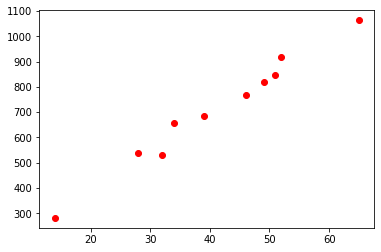

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df['size'])
y = np.array(df['price'])
plt.scatter(x, y, c='r')

We want to learn $a$ and $b$ such that the predictions $f(x_i) = ax_i + b$.

Write a function `loss` that computes the squared loss: $$ \mathcal{L} = \sum_i (f(x_i) - y_i)^2 $$

What is the derivative of this function with respect to $a$ and $b$?

Implement gradient descent during 20 steps:

For each step:  
> For each sample $i$:  
>> $a \gets a - \gamma \frac{\partial \mathcal{L}}{\partial a}$  
>> $b \gets b - \gamma \frac{\partial \mathcal{L}}{\partial b}$

> Print loss at each step

In [4]:
def loss(params):
    a, b = params
    # Your code here

gamma = 0.1
# Implement gradient descent here

What happens? Try lower values of $\gamma$.

Using `plt.plot`, display the line of your model.

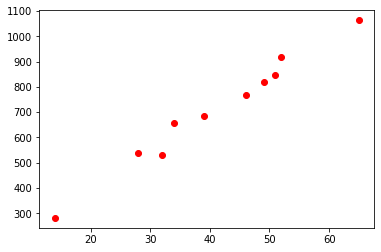

In [5]:
plt.scatter(x, y, c='r')
t = np.arange(0, 80, 1)
# plt.plot(t, a * t + b)

Now that you've trained your first machine learning model, you can use the code provided by the package scikit-learn.

You just need to declare the features in a matrix (not vector) and run:

- `fit(X, y)` to train;
- `score(X, y)` to get a measure of correctness (1 is best); for linear regression it is the coefficient of determination $R^2$.

In [6]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)  # Transform the vector x into a matrix X

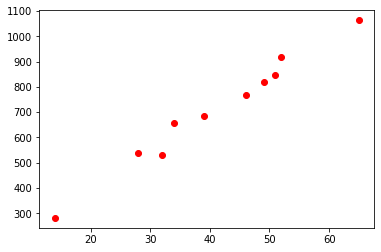

In [9]:
plt.scatter(x, y, c='r')
t = np.arange(0, 80, 1)
# Visualize the coefficients learned by scikit-learn's linear regression
# a, b = model.coef_[0], model.intercept_
# plt.plot(t, a * t + b)
# a, b

## 2 - Simple classification of tumors

In [10]:
df = pd.read_csv('2tumors.csv')
df

,color,size,label
0,0.860172,3.352011,1.0
1,1.206664,3.677313,1.0
2,0.847279,2.869402,1.0
3,1.305340,2.250628,1.0
4,0.513919,2.169618,1.0
...,...,...,...
395,1.628342,4.970346,-1.0
396,2.620280,4.826318,-1.0
397,2.041993,4.053759,-1.0
398,2.517886,4.211410,-1.0


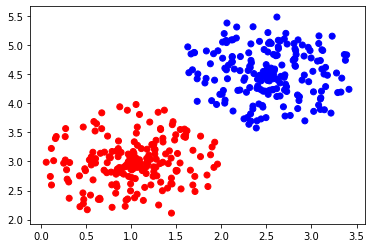

In [12]:
x = np.array(df['color'])
y = np.array(df['size'])
r = np.array(df['label'])
colors = ['r' if label > 0 else 'b' for label in r]

plt.scatter(x, y, c=colors)

Now the problem is different: we want to predict either 1 or -1.

Hence the penalty depends on $yf(x)$ (positive is better): $$\mathcal{L} = \sum_i \Phi(y_i f(x_i))$$

Here are various choices for $\Phi$:

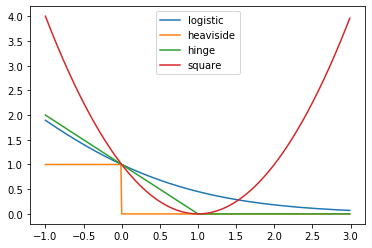

In [13]:
import autograd.numpy as np

# Different loss functions for classification
def logistic(x):
    return np.log(1 + np.exp(-x)) / np.log(2)

def heaviside(x):
    return (np.sign(-x) + 1.) // 2

def hinge(x):
    return np.maximum(0., 1 - x)

def square(x):
    return (1 - x) ** 2

t = np.arange(-1, 3, 0.01)
for f in [logistic, heaviside, hinge, square]:
    plt.plot(t, f(t), label=f.__name__)
plt.legend()

Our model is simple: if $y > ax + b$, predict 1, otherwise predict -1.

Write the corresponding loss function, depending on $\Phi$.

In [14]:
PHI = logistic

def loss(params):
    a, b = params
    # Your code here

To implement gradient descent this time, we will cheat. There is a package `autograd` that can compute the gradient of any numpy function.

In [15]:
from autograd import grad

gradient_loss = grad(loss)

Then if $w$ are `params`, `gradient_loss(params)` represents $\frac{\partial \mathcal{L}}{\partial w}$ at point $w$.

Try various values of `PHI` and `gamma`. You can then plot the results:

(1, 6)

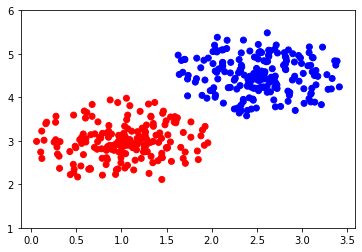

In [17]:
t = np.arange(0, 5, 1)
f, ax = plt.subplots(1)
plt.scatter(x, y, c=colors)
# a, b = params
# plt.plot(t, a * t + b)
ax.set_ylim((1, 6))

Let's compare the results with scikit-learn's logistic regression implementation.

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none')
X = np.column_stack((x, y))
model.fit(X, r)

w1, w2 = model.coef_.reshape(-1)
bias = model.intercept_[0]
a, b = [-w1 / w2, -bias / w2]

(1, 6)

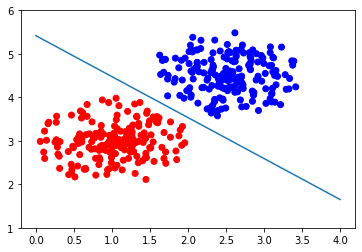

In [19]:
t = np.arange(0, 5, 1)
f, ax = plt.subplots(1)
plt.scatter(x, y, c=colors)

plt.plot(t, a * t + b)
ax.set_ylim((1, 6))

## 3 - Classification of tumors

Let us now consider a more complicated example.

In [20]:
df = pd.read_csv('3tumors.csv')
df.head()

,color,size,label
0,3.834564,1.654981,-1.0
1,-1.090146,-0.434695,-1.0
2,-2.905435,-0.873267,1.0
3,3.841463,1.641557,-1.0
4,-3.393475,2.432151,1.0


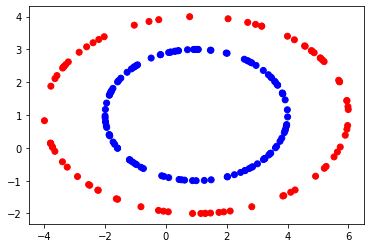

In [22]:
x = np.array(df['color'])
y = np.array(df['size'])
r = np.array(df['label'])
colors = ['r' if label > 0 else 'b' for label in r]

plt.scatter(x, y, c=colors)

Compute the score of scikit-learn's logistic regression. What happens?

What model are we trying to learn? How to add features?

Try also `from sklearn.svm import SVC`.

## 4 - Classification of handwritten digits

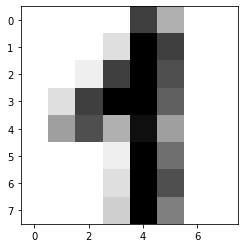

In [24]:
from sklearn import datasets, metrics

digits = datasets.load_digits()
plt.imshow(digits.images[42], cmap=plt.cm.gray_r)

In [25]:
from sklearn.model_selection import train_test_split

X = digits.images.reshape(-1, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

Compare the performance of scikit-learn's logistic regression and SVC.

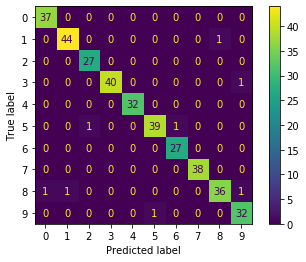

In [104]:
# metrics.plot_confusion_matrix(model, X_test, y_test)

Display an entry that the logistic regression model gets wrong.

<BarContainer object of 10 artists>

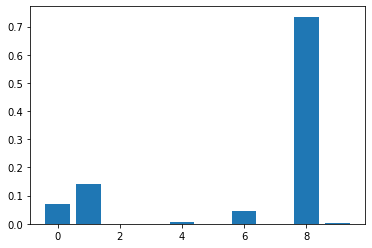

In [106]:
# plt.bar(range(10), model.predict_proba(X_test[bad_sample].reshape(1, -1)).reshape(-1))